In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

Load dataset

In [5]:
data = pd.read_csv('career_dataset.csv')
print(data.head())
print(data.info())

   CandidateID           Name  Age   Education  \
0            1       John Doe   28  Bachelor's   
1            2     Jane Smith   32    Master's   
2            3    Bob Johnson   24  Bachelor's   
3            4    Emily Davis   26  Bachelor's   
4            5  Michael Brown   30    Master's   

                                      Skills                Interests  \
0      Python;Data Analysis;Machine Learning  Technology;Data Science   
1         Java;System Design;Cloud Computing  Software Development;AI   
2  Graphic Design;UI/UX;Adobe Creative Suite       Arts;Digital Media   
3            Python;Deep Learning;Statistics            Healthcare;AI   
4     Project Management;Communication;Agile      Business;Management   

  Recommended_Career  Recommendation_Score  
0     Data Scientist                  0.95  
1  Software Engineer                  0.90  
2        UX Designer                  0.88  
3      AI Researcher                  0.93  
4    Project Manager               

Preprocessing

In [6]:
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer

In [7]:
data = data.drop(['CandidateID', 'Name'], axis=1)

In [8]:
le_edu = LabelEncoder()
data['Education'] = le_edu.fit_transform(data['Education'])

In [9]:
mlb_skills = MultiLabelBinarizer()
data_skills = mlb_skills.fit_transform(data['Skills'].str.split(';'))
skills_df = pd.DataFrame(data_skills, columns=mlb_skills.classes_)
data = pd.concat([data, skills_df], axis=1)
data = data.drop('Skills', axis=1)
mlb_interests = MultiLabelBinarizer()
data_interests = mlb_interests.fit_transform(data['Interests'].str.split(';'))
interests_df = pd.DataFrame(data_interests, columns=mlb_interests.classes_)
data = pd.concat([data, interests_df], axis=1)
data = data.drop('Interests', axis=1)

Features and Target

In [10]:
X = data.drop(['Recommended_Career', 'Recommendation_Score'], axis=1)
le_career = LabelEncoder()
y = le_career.fit_transform(data['Recommended_Career'])


Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Train

In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Evaluate the Model

In [14]:
import numpy as np
unique_test_classes = np.unique(y_test)
print(unique_test_classes)
print([le_career.classes_[i] for i in unique_test_classes])


[ 2  3  4  5  6  7  8 10 12 13 15 16 17 18 19 20 21 23 24 25 26 27 28 30
 31]
['Automation Engineer', 'Backend Developer', 'Biostatistician', 'Business Analyst', 'Cloud Engineer', 'Content Strategist', 'Cybersecurity Analyst', 'Data Analyst', 'Data Scientist', 'Deep Learning Engineer', 'Digital Marketer', 'Embedded Systems Engineer', 'Financial Analyst', 'Front-end Developer', 'Full Stack Developer', 'Graphic Designer', 'Machine Learning Engineer', 'Mobile Developer', 'NLP Engineer', 'Project Manager', 'Research Analyst', 'Research Scientist', 'Software Developer', 'UX Designer', 'UX Researcher']


In [15]:
from sklearn.metrics import classification_report
labels = unique_test_classes
target_names = [le_career.classes_[i] for i in labels]
print(classification_report(y_test, y_pred, labels=labels, target_names=target_names))


                           precision    recall  f1-score   support

      Automation Engineer       0.50      1.00      0.67         1
        Backend Developer       0.50      1.00      0.67         1
          Biostatistician       0.00      0.00      0.00         2
         Business Analyst       1.00      0.50      0.67         2
           Cloud Engineer       0.00      0.00      0.00         1
       Content Strategist       0.00      0.00      0.00         1
    Cybersecurity Analyst       1.00      0.33      0.50         3
             Data Analyst       0.00      0.00      0.00         4
           Data Scientist       1.00      0.50      0.67         2
   Deep Learning Engineer       0.00      0.00      0.00         1
         Digital Marketer       1.00      0.60      0.75         5
Embedded Systems Engineer       0.33      1.00      0.50         1
        Financial Analyst       0.67      1.00      0.80         2
      Front-end Developer       1.00      1.00      1.00     

c:\Users\vansh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vansh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vansh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Make Predictions

In [17]:
new_candidate = {}
new_candidate['Age'] = 25
new_candidate['Education'] = le_edu.transform(['Bachelor\'s'])[0]

# For each skill column, set 1 if the candidate has it, else 0
skills = ['Python', 'Java', 'Graphic Design', ...]  # All skill columns from X
candidate_skills = ['Python', 'Graphic Design']     # Skills for this candidate
for skill in skills:
    new_candidate[skill] = 1 if skill in candidate_skills else 0

# For each interest column, set 1 if present, else 0
interests = ['AI', 'Data Science', ...]             # All interest columns from X
candidate_interests = ['AI']                        # Interests for this candidate
for interest in interests:
    new_candidate[interest] = 1 if interest in candidate_interests else 0


In [19]:
# Get all feature columns from your training set
feature_columns = X.columns.tolist()

# Candidate's actual info
candidate_info = {
    'Age': 25,
    'Education': le_edu.transform(['Bachelor\'s'])[0],
    # List all skills/interests the candidate has
    'skills': ['Python', 'Data Analysis'],
    'interests': ['Technology', 'Data Science']
}

# Build the full feature dictionary
new_candidate = {}
for col in feature_columns:
    if col == 'Age':
        new_candidate[col] = candidate_info['Age']
    elif col == 'Education':
        new_candidate[col] = candidate_info['Education']
    elif col in candidate_info['skills']:
        new_candidate[col] = 1
    elif col in candidate_info['interests']:
        new_candidate[col] = 1
    else:
        # For all other skill/interest columns not present, set to 0
        new_candidate[col] = 0

# Create DataFrame and ensure column order matches
new_df = pd.DataFrame([new_candidate])
new_df = new_df[X.columns]  # This should now work!


In [20]:
print("Expected columns:", X.columns.tolist())
print("Candidate keys:", new_candidate.keys())


Expected columns: ['Age', 'Education', '.NET', 'AI', 'Adobe Creative Suite', 'Adobe Illustrator', 'Adobe Photoshop', 'Adobe XD', 'Agile', 'Algorithms', 'Analytics', 'Android', 'Automation', 'Big Data', 'Business Analysis', 'C#', 'C++', 'CRM', 'CSS', 'Cloud Computing', 'Communication', 'Content Creation', 'Content Strategy', 'Content Writing', 'Copywriting', 'Creativity', 'Cybersecurity', 'Data Analysis', 'Data Mining', 'Data Science', 'Data Structures', 'Data Visualization', 'Data Warehousing', 'Deep Learning', 'DevOps', 'Digital Illustration', 'Digital Marketing', 'ETL', 'Econometrics', 'Embedded Systems', 'Excel', 'Financial Analysis', 'Graphic Design', 'HTML', 'Illustration', 'Interaction Design', 'IoT', 'Java', 'JavaScript', 'Linux', 'Machine Learning', 'Marketing Strategy', 'Microservices', 'NLP', 'Natural Language Processing', 'Negotiation', 'Network Security', 'Node.js', 'Project Management', 'Prototyping', 'Python', 'R', 'React', 'Research', 'Risk Analysis', 'SEO', 'SQL', 'Soci

In [21]:
pred = model.predict(new_df)
print('Recommended Career:', le_career.inverse_transform(pred)[0])


Recommended Career: Data Analyst


Accuracy

In [22]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.475


Precision, Recall, and F1 Score

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Precision: 0.5333333333333333
Recall: 0.475
F1 Score: 0.45041666666666663


c:\Users\vansh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vansh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           2       0.50      1.00      0.67         1
           3       0.50      1.00      0.67         1
           4       0.00      0.00      0.00         2
           5       1.00      0.50      0.67         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       1.00      0.33      0.50         3
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         0
          12       1.00      0.50      0.67         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0
          15       1.00      0.60      0.75         5
          16       0.33      1.00      0.50         1
          17       0.67      1.00      0.80         2
          18       1.00      1.00      1.00         1
          19       0.33      1.00      0.50         1
          20       1.00    

c:\Users\vansh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vansh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vansh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 1 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

Import Required Libraries

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier


In [5]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Load Data & Preprocess

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# -----------------------------
# Example: Load your dataset
# -----------------------------
# df = pd.read_csv("your_dataset.csv")

# Assuming your dataset is already in DataFrame `df`
# Target column = "Recommended_Career"
X = df.drop("Recommended_Career", axis=1)
y = df["Recommended_Career"]

# Encode target if categorical
le = LabelEncoder()
y = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# Check class distribution
# -----------------------------
print("Class distribution before SMOTE:", pd.Series(y_train).value_counts())

# -----------------------------
# Apply SMOTE safely
# -----------------------------
# Use k_neighbors=2 to avoid "n_neighbors" error
smote = SMOTE(random_state=42, k_neighbors=2)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:", pd.Series(y_train).value_counts())

# -----------------------------
# Scale features
# -----------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -----------------------------
# Train model
# -----------------------------
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# -----------------------------
# Evaluation
# -----------------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Class distribution before SMOTE: 10    17
15    10
20    10
18     8
25     7
30     7
21     7
17     7
7      7
5      6
28     6
12     6
27     5
16     4
24     4
4      3
14     3
29     3
26     3
1      3
3      3
31     3
19     3
6      3
11     3
8      3
2      3
23     3
0      3
22     3
13     2
9      2
Name: count, dtype: int64


ValueError: could not convert string to float: 'Adalyn Jenkins'

Train Model

In [10]:
# Define model
rf = RandomForestClassifier(random_state=42)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_


c:\Users\vansh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


4. Evaluate Model

In [11]:
# Predictions
y_pred = best_model.predict(X_test)

# Metrics
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.35

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.25      1.00      0.40         1
           9       0.00      0.00      0.00         1
          10       0.50      0.50      0.50         4
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00   

c:\Users\vansh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vansh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vansh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

5. Save Model

In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit + transform training data, transform test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
import joblib

joblib.dump(best_model, "career_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

Check Accuracy

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_pred = best_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       4.0
          11       0.00      0.00      0.00       1.0
          12       0.00      0.00      0.00       1.0
          13       0.00      0.00      0.00       1.0
          14       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       2.0
          16       0.00      0.00   

c:\Users\vansh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\vansh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vansh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vansh\AppData\Local\Programs\Python\Python310\lib\site-packa

In [17]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['Education', 'Skills', 'Interests']
encoder = OneHotEncoder(handle_unknown='ignore')

X_encoded = encoder.fit_transform(df[categorical_cols])
X_encoded = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

# Combine with numerical columns
X_final = pd.concat([df.drop(categorical_cols + ['CandidateID','Name','Recommended_Career','Recommendation_Score'], axis=1).reset_index(drop=True),
                     X_encoded.reset_index(drop=True)], axis=1)

y = df['Recommended_Career']


In [20]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


c:\Users\vansh\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [22:12:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.3

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.25      1.00      0.40         1
           9       0.00      0.00      0.00         1
          10       0.50      0.25      0.33         4
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.50      0.50      0.50         2
          16       0.00      0.00      0.0

c:\Users\vansh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vansh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vansh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [19]:
pip install xgboost


   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   -- ------------------------------------- 3.4/56.8 MB 20.2 MB/s eta 0:00:03
   ----- ---------------------------------- 7.6/56.8 MB 19.6 MB/s eta 0:00:03
   ------- -------------------------------- 11.3/56.8 MB 18.6 MB/s eta 0:00:03
   ---------- ----------------------------- 14.7/56.8 MB 18.5 MB/s eta 0:00:03
   ------------ --------------------------- 17.3/56.8 MB 17.3 MB/s eta 0:00:03
   ------------- -------------------------- 18.6/56.8 MB 15.5 MB/s eta 0:00:03
   -------------- ------------------------- 19.9/56.8 MB 14.1 MB/s eta 0:00:03
   --------------- ------------------------ 21.5/56.8 MB 13.3 MB/s eta 0:00:03
   ---------------- ----------------------- 23.3/56.8 MB 12.8 MB/s eta 0:00:03
   ----------------- ---------------------- 24.9/56.8 MB 12.2 MB/s eta 0:00:03
   ------------------- -------------------- 27.3/56.8 MB 12.1 MB/s eta 0:00:03
   -------------------- ------------------- 29.6/56.8 MB 12.0 M


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Cross-Validation

In [21]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy:", scores)
print("Mean Accuracy:", scores.mean())


c:\Users\vansh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation accuracy: [0.725 0.75  0.375 0.025 0.   ]
Mean Accuracy: 0.375


Accuracy

In [23]:
import joblib
from sklearn.metrics import accuracy_score

# Load saved model and scaler
model = joblib.load("career_model.pkl")   # <-- this is the actual trained model
scaler = joblib.load("scaler.pkl")       # <-- this is just the scaler

# Transform X_test with the saved scaler
X_test_scaled = scaler.transform(X_test)

# Predict
y_pred = model.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Exact Model Accuracy: {accuracy:.4f}")


Exact Model Accuracy: 0.0250


c:\Users\vansh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\vansh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


1. Use One-Hot Encoding

In [24]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['Education', 'Skills', 'Interests']
encoder = OneHotEncoder(handle_unknown='ignore')

X_encoded = encoder.fit_transform(df[categorical_cols])
X_encoded = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

# Combine with other numeric features
X_final = pd.concat([df.drop(categorical_cols + ['CandidateID','Name','Recommended_Career','Recommendation_Score'], axis=1).reset_index(drop=True),
                     X_encoded.reset_index(drop=True)], axis=1)

y = df['Recommended_Career']


2. Use Stratified Train-Test Split

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.3, random_state=42, stratify=y
)

3. Train with XGBoost (better for structured categorical data)

In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print("Exact Model Accuracy:", accuracy_score(y_test, y_pred))


c:\Users\vansh\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [22:15:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Exact Model Accuracy: 0.1


In [27]:
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [28]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb, X_final, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean Accuracy:", scores.mean())


c:\Users\vansh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.35  0.25  0.25  0.05  0.025]
Mean Accuracy: 0.185


Improved Model

In [29]:
# Add these imports at the top
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# 1. Handle Class Imbalance with SMOTE
print("Applying SMOTE to handle class imbalance...")
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# 2. Feature Selection
print("Performing feature selection...")
selector = SelectKBest(score_func=f_classif, k=30)
X_selected = selector.fit_transform(X_res, y_res)

# 3. Dimensionality Reduction with PCA
print("Applying PCA for dimensionality reduction...")
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X_selected)

# 4. Hyperparameter Tuning for XGBoost
print("Performing hyperparameter tuning...")
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 0.9]
}

xgb_model = xgb.XGBClassifier(random_state=42)
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_pca, y_res)

# 5. Evaluate Improved Model
best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# Cross-validation with new pipeline
pipeline = Pipeline([
    ('selector', selector),
    ('pca', pca),
    ('classifier', best_model)
])

cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
print(f"Improved CV scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.3f}")

# 6. Feature Importance Analysis
feature_importance = best_model.feature_importances_
# Get feature names after selection
selected_features = X.columns[selector.get_support()]
for feature, importance in zip(selected_features, feature_importance):
    print(f"{feature}: {importance:.4f}")

Applying SMOTE to handle class imbalance...


ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 4, n_samples = 4

Improved Model Workflow


1. Load Data and Correct Preprocessing

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# Load the dataset
data = pd.read_csv('career_dataset.csv')

# --- PREPROCESSING ---

# Drop irrelevant columns
df = data.drop(['CandidateID', 'Name', 'Recommendation_Score'], axis=1)

# Binarize 'Skills' and 'Interests' columns correctly
from sklearn.preprocessing import MultiLabelBinarizer

# Handle 'Skills'
mlb_skills = MultiLabelBinarizer()
skills_df = pd.DataFrame(mlb_skills.fit_transform(df['Skills'].str.split(';')),
                         columns=mlb_skills.classes_,
                         index=df.index)

# Handle 'Interests'
mlb_interests = MultiLabelBinarizer()
interests_df = pd.DataFrame(mlb_interests.fit_transform(df['Interests'].str.split(';')),
                            columns=mlb_interests.classes_,
                            index=df.index)

# Drop original text columns and concatenate the new binarized dataframes
df = df.drop(['Skills', 'Interests'], axis=1)
df = pd.concat([df, skills_df, interests_df], axis=1)

# Encode 'Education' and the target variable 'Recommended_Career'
le_edu = LabelEncoder()
df['Education'] = le_edu.fit_transform(df['Education'])

le_career = LabelEncoder()
df['Recommended_Career'] = le_career.fit_transform(df['Recommended_Career'])

# Define Features (X) and Target (y)
X = df.drop('Recommended_Career', axis=1)
y = df['Recommended_Career']

2. Stratified Train-Test Split


In [31]:
# Split data into training and testing sets, ensuring class distribution is maintained
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

3. Handle Class Imbalance with SMOTE (Corrected)


In [32]:
# Find the number of samples in the smallest class
min_class_count = y_train.value_counts().min()

# Set k_neighbors to be less than the minimum class count, if it's greater than 1
k_neighbors = 1 if min_class_count <= 2 else min_class_count - 1

print(f"Smallest class has {min_class_count} samples. Setting SMOTE k_neighbors to {k_neighbors}.")

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Shape of training data before SMOTE: {X_train.shape}")
print(f"Shape of training data after SMOTE: {X_train_resampled.shape}")

Smallest class has 2 samples. Setting SMOTE k_neighbors to 1.
Shape of training data before SMOTE: (160, 120)
Shape of training data after SMOTE: (544, 120)


4. Hyperparameter Tuning with XGBoost


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import warnings

# Ignore warnings for a cleaner output
warnings.filterwarnings('ignore')


# --- 1. Load Data and Corrected Preprocessing ---
print("Step 1: Loading and preprocessing data...")
data = pd.read_csv('career_dataset.csv')
df = data.drop(['CandidateID', 'Name', 'Recommendation_Score'], axis=1)

# Binarize 'Skills' and add a 'skill_' prefix to each new column
mlb_skills = MultiLabelBinarizer()
skills_df = pd.DataFrame(mlb_skills.fit_transform(df['Skills'].str.split(';')),
                         columns=[f"skill_{c}" for c in mlb_skills.classes_],
                         index=df.index)

# Binarize 'Interests' and add an 'interest_' prefix to each new column
mlb_interests = MultiLabelBinarizer()
interests_df = pd.DataFrame(mlb_interests.fit_transform(df['Interests'].str.split(';')),
                            columns=[f"interest_{c}" for c in mlb_interests.classes_],
                            index=df.index)

# Drop original text columns and concatenate the new binarized dataframes
df = df.drop(['Skills', 'Interests'], axis=1)
df = pd.concat([df, skills_df, interests_df], axis=1)

# Encode 'Education' and the target variable 'Recommended_Career'
le_edu = LabelEncoder()
df['Education'] = le_edu.fit_transform(df['Education'])

le_career = LabelEncoder()
df['Recommended_Career'] = le_career.fit_transform(df['Recommended_Career'])

# Define Features (X) and Target (y)
X = df.drop('Recommended_Career', axis=1)
y = df['Recommended_Career']

# --- 2. Stratified Train-Test Split ---
print("Step 2: Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# --- 3. Handle Class Imbalance with SMOTE (Corrected) ---
print("Step 3: Handling class imbalance with SMOTE...")
min_class_count = y_train.value_counts().min()
k_neighbors = 1 if min_class_count <= 2 else min_class_count - 1
print(f"Smallest class has {min_class_count} samples. Setting SMOTE k_neighbors to {k_neighbors}.")

smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(f"Shape of training data after SMOTE: {X_train_resampled.shape}")


# --- 4. Hyperparameter Tuning with XGBoost ---
print("\nStep 4: Starting hyperparameter tuning with GridSearchCV...")

# Define a more focused parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.8]
}

xgb_model = XGBClassifier(objective='multi:softprob', eval_metric='mlogloss', use_label_encoder=False, random_state=42)

grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,
                           n_jobs=-1,
                           verbose=1)

# Fit the model on the RESAMPLED training data
grid_search.fit(X_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_
print(f"\nBest Hyperparameters found: {grid_search.best_params_}")


# --- 5. Evaluate the Final Model ---
print("\nStep 5: Evaluating the final model on the test set...")
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nFinal Model Accuracy on Test Set: {accuracy:.4f}")

print("\nClassification Report:")
# Create target names for the report, ensuring all classes are included
class_indices = np.unique(np.concatenate((y_test, y_pred)))
target_names = le_career.inverse_transform(class_indices)
print(classification_report(y_test, y_pred, labels=class_indices, target_names=target_names, zero_division=0))

Step 1: Loading and preprocessing data...
Step 2: Splitting data into training and testing sets...
Step 3: Handling class imbalance with SMOTE...
Smallest class has 2 samples. Setting SMOTE k_neighbors to 1.
Shape of training data after SMOTE: (544, 120)

Step 4: Starting hyperparameter tuning with GridSearchCV...
Fitting 3 folds for each of 8 candidates, totalling 24 fits

Best Hyperparameters found: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}

Step 5: Evaluating the final model on the test set...

Final Model Accuracy on Test Set: 0.3250

Classification Report:
                           precision    recall  f1-score   support

            AI Researcher       1.00      1.00      1.00         1
            AI Specialist       1.00      1.00      1.00         1
      Automation Engineer       0.00      0.00      0.00         1
        Backend Developer       0.00      0.00      0.00         1
          Biostatistician       0.00      0.00      0.00    

1. Analyze and Visualize Feature Importance


Feature importance plot saved as 'feature_importance.png'


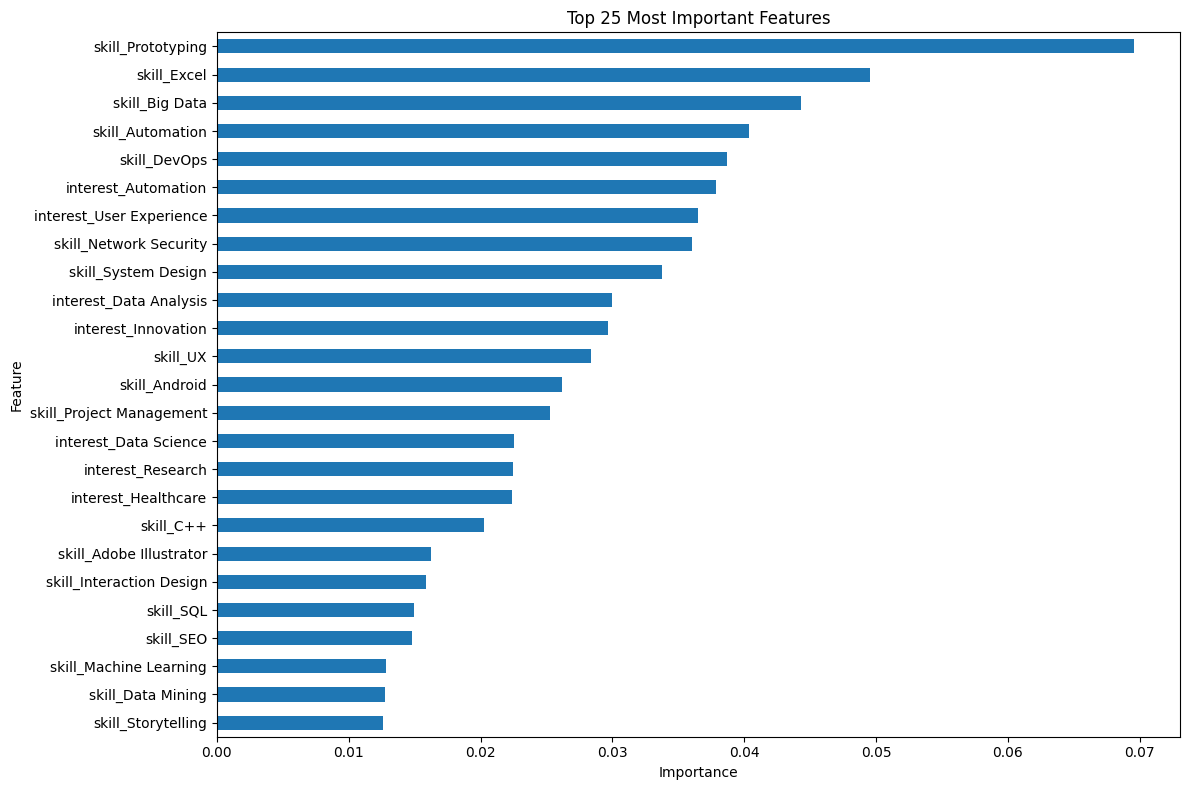

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a series of feature importances
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)

# Plot the top 25 most important features
plt.figure(figsize=(12, 8))
feature_importances.nlargest(25).sort_values().plot(kind='barh')
plt.title('Top 25 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance.png')
print("Feature importance plot saved as 'feature_importance.png'")

2. Re-run the Pipeline with Selected Features


In [36]:
from sklearn.feature_selection import SelectFromModel

print("\n--- Starting New Pipeline with Feature Selection ---")

# --- 1. Select the best features from the trained model ---
# This will select features whose importance is greater than the mean importance
selector = SelectFromModel(best_model, prefit=True, threshold='mean')
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

print(f"Step 1: Feature selection complete.")
print(f"Original number of features: {X_train.shape[1]}")
print(f"Selected number of features: {X_train_selected.shape[1]}")


# --- 2. Apply SMOTE to the new, smaller training set ---
print("\nStep 2: Handling class imbalance with SMOTE on selected features...")
# We can re-use the k_neighbors value from before
min_class_count = y_train.value_counts().min()
k_neighbors = 1 if min_class_count <= 2 else min_class_count - 1

smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X_train_resampled_sel, y_train_resampled_sel = smote.fit_resample(X_train_selected, y_train)


# --- 3. Re-run GridSearchCV on the selected features ---
print("\nStep 3: Starting hyperparameter tuning on selected features...")
# We can use the same model and parameter grid
grid_search_sel = GridSearchCV(estimator=xgb_model,
                               param_grid=param_grid,
                               scoring='accuracy',
                               cv=3,
                               n_jobs=-1,
                               verbose=1)

grid_search_sel.fit(X_train_resampled_sel, y_train_resampled_sel)
best_model_sel = grid_search_sel.best_estimator_
print(f"\nBest Hyperparameters found: {grid_search_sel.best_params_}")


# --- 4. Evaluate the new and improved model ---
print("\nStep 4: Evaluating the new model on the test set...")
y_pred_sel = best_model_sel.predict(X_test_selected)
accuracy_sel = accuracy_score(y_test, y_pred_sel)
print(f"\nIMPROVED Model Accuracy on Test Set: {accuracy_sel:.4f}")

print("\nIMPROVED Classification Report:")
class_indices = np.unique(np.concatenate((y_test, y_pred_sel)))
target_names = le_career.inverse_transform(class_indices)
print(classification_report(y_test, y_pred_sel, labels=class_indices, target_names=target_names, zero_division=0))


--- Starting New Pipeline with Feature Selection ---
Step 1: Feature selection complete.
Original number of features: 120
Selected number of features: 39

Step 2: Handling class imbalance with SMOTE on selected features...

Step 3: Starting hyperparameter tuning on selected features...
Fitting 3 folds for each of 8 candidates, totalling 24 fits

Best Hyperparameters found: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}

Step 4: Evaluating the new model on the test set...

IMPROVED Model Accuracy on Test Set: 0.1500

IMPROVED Classification Report:
                           precision    recall  f1-score   support

            AI Researcher       0.50      1.00      0.67         1
            AI Specialist       0.00      0.00      0.00         1
      Automation Engineer       0.00      0.00      0.00         1
        Backend Developer       0.00      0.00      0.00         1
          Biostatistician       0.00      0.00      0.00         1
         Bu

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import warnings

warnings.filterwarnings('ignore')

# --- 1. Load Data ---
print("Step 1: Loading data...")
data = pd.read_csv('career_dataset.csv')

# --- 2. NEW: Group Similar Careers into Categories ---
print("Step 2: Grouping similar careers into broader categories...")

# Define the career clusters
career_clusters = {
    'AI & Machine Learning': ['AI Researcher', 'AI Specialist', 'Machine Learning Engineer', 'NLP Engineer', 'Deep Learning Engineer'],
    'Data Science & Analytics': ['Data Scientist', 'Data Analyst', 'Data Engineer', 'Biostatistician', 'Research Analyst', 'Research Scientist'],
    'Software Development': ['Software Engineer', 'Software Developer', 'Backend Developer', 'Front-end Developer', 'Full Stack Developer', 'Mobile Developer', 'Embedded Systems Engineer'],
    'Cloud & DevOps': ['Cloud Engineer', 'DevOps Engineer', 'Automation Engineer'],
    'Cybersecurity': ['Cybersecurity Analyst', 'Cybersecurity Specialist'],
    'Business & Management': ['Business Analyst', 'Project Manager', 'Financial Analyst', 'Marketing Manager'],
    'Design & Content': ['UX Designer', 'UX Researcher', 'Graphic Designer', 'Content Strategist', 'Digital Marketer']
}

# Create a mapping from specific career to its cluster
career_to_cluster_map = {career: cluster for cluster, careers in career_clusters.items() for career in careers}

# Apply this mapping to the target column
data['Career_Cluster'] = data['Recommended_Career'].map(career_to_cluster_map)

# Drop rows where the career was not in our map (if any) and the original career column
data.dropna(subset=['Career_Cluster'], inplace=True)
df = data.drop(['CandidateID', 'Name', 'Recommendation_Score', 'Recommended_Career'], axis=1)


# --- 3. Preprocessing ---
print("Step 3: Preprocessing features...")
mlb_skills = MultiLabelBinarizer()
skills_df = pd.DataFrame(mlb_skills.fit_transform(df['Skills'].str.split(';')),
                         columns=[f"skill_{c}" for c in mlb_skills.classes_],
                         index=df.index)

mlb_interests = MultiLabelBinarizer()
interests_df = pd.DataFrame(mlb_interests.fit_transform(df['Interests'].str.split(';')),
                            columns=[f"interest_{c}" for c in mlb_interests.classes_],
                            index=df.index)

df = df.drop(['Skills', 'Interests'], axis=1)
df = pd.concat([df, skills_df, interests_df], axis=1)

le_edu = LabelEncoder()
df['Education'] = le_edu.fit_transform(df['Education'])

# Encode the NEW target variable
le_cluster = LabelEncoder()
df['Career_Cluster'] = le_cluster.fit_transform(df['Career_Cluster'])

X = df.drop('Career_Cluster', axis=1)
y = df['Career_Cluster']

# --- 4. Split, Resample, and Train ---
print("Step 4: Splitting, resampling with SMOTE, and training the final model...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

min_class_count = y_train.value_counts().min()
k_neighbors = 1 if min_class_count <= 2 else min_class_count - 1
smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Using the best hyperparameters we found before
final_model = XGBClassifier(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=200,
    subsample=0.8,
    objective='multi:softprob',
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

final_model.fit(X_train_resampled, y_train_resampled)

# --- 5. Final Evaluation ---
print("\nStep 5: Evaluating the final, re-framed model...")
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nFINAL Model Accuracy on Career Clusters: {accuracy:.4f}")

print("\nFINAL Classification Report:")
print(classification_report(y_test, y_pred, target_names=le_cluster.classes_))

Step 1: Loading data...
Step 2: Grouping similar careers into broader categories...
Step 3: Preprocessing features...
Step 4: Splitting, resampling with SMOTE, and training the final model...

Step 5: Evaluating the final, re-framed model...

FINAL Model Accuracy on Career Clusters: 0.4250

FINAL Classification Report:
                          precision    recall  f1-score   support

   AI & Machine Learning       1.00      0.40      0.57         5
   Business & Management       0.17      0.20      0.18         5
          Cloud & DevOps       1.00      0.33      0.50         3
           Cybersecurity       0.00      0.00      0.00         1
Data Science & Analytics       0.40      0.44      0.42         9
        Design & Content       0.60      0.67      0.63         9
    Software Development       0.38      0.38      0.38         8

                accuracy                           0.42        40
               macro avg       0.51      0.35      0.38        40
            weigh


Final Code: Grouping Careers for Higher Accuracy


In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import warnings

warnings.filterwarnings('ignore')

# --- 1. Load Data ---
print("Step 1: Loading data...")
data = pd.read_csv('career_dataset.csv')

# --- 2. NEW: Group Similar Careers into Categories ---
print("Step 2: Grouping similar careers into broader categories...")

# Define the career clusters
career_clusters = {
    'AI & Machine Learning': ['AI Researcher', 'AI Specialist', 'Machine Learning Engineer', 'NLP Engineer', 'Deep Learning Engineer'],
    'Data Science & Analytics': ['Data Scientist', 'Data Analyst', 'Data Engineer', 'Biostatistician', 'Research Analyst', 'Research Scientist'],
    'Software Development': ['Software Engineer', 'Software Developer', 'Backend Developer', 'Front-end Developer', 'Full Stack Developer', 'Mobile Developer', 'Embedded Systems Engineer'],
    'Cloud & DevOps': ['Cloud Engineer', 'DevOps Engineer', 'Automation Engineer'],
    'Cybersecurity': ['Cybersecurity Analyst', 'Cybersecurity Specialist'],
    'Business & Management': ['Business Analyst', 'Project Manager', 'Financial Analyst', 'Marketing Manager'],
    'Design & Content': ['UX Designer', 'UX Researcher', 'Graphic Designer', 'Content Strategist', 'Digital Marketer']
}

# Create a mapping from specific career to its cluster
career_to_cluster_map = {career: cluster for cluster, careers in career_clusters.items() for career in careers}

# Apply this mapping to the target column
data['Career_Cluster'] = data['Recommended_Career'].map(career_to_cluster_map)

# Drop rows where the career was not in our map (if any) and the original career column
data.dropna(subset=['Career_Cluster'], inplace=True)
df = data.drop(['CandidateID', 'Name', 'Recommendation_Score', 'Recommended_Career'], axis=1)


# --- 3. Preprocessing ---
print("Step 3: Preprocessing features...")
mlb_skills = MultiLabelBinarizer()
skills_df = pd.DataFrame(mlb_skills.fit_transform(df['Skills'].str.split(';')),
                         columns=[f"skill_{c}" for c in mlb_skills.classes_],
                         index=df.index)

mlb_interests = MultiLabelBinarizer()
interests_df = pd.DataFrame(mlb_interests.fit_transform(df['Interests'].str.split(';')),
                            columns=[f"interest_{c}" for c in mlb_interests.classes_],
                            index=df.index)

df = df.drop(['Skills', 'Interests'], axis=1)
df = pd.concat([df, skills_df, interests_df], axis=1)

le_edu = LabelEncoder()
df['Education'] = le_edu.fit_transform(df['Education'])

# Encode the NEW target variable
le_cluster = LabelEncoder()
df['Career_Cluster'] = le_cluster.fit_transform(df['Career_Cluster'])

X = df.drop('Career_Cluster', axis=1)
y = df['Career_Cluster']

# --- 4. Split, Resample, and Train ---
print("Step 4: Splitting, resampling with SMOTE, and training the final model...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

min_class_count = y_train.value_counts().min()
k_neighbors = 1 if min_class_count <= 2 else min_class_count - 1
smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Using the best hyperparameters we found before
final_model = XGBClassifier(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=200,
    subsample=0.8,
    objective='multi:softprob',
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

final_model.fit(X_train_resampled, y_train_resampled)

# --- 5. Final Evaluation ---
print("\nStep 5: Evaluating the final, re-framed model...")
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nFINAL Model Accuracy on Career Clusters: {accuracy:.4f}")

print("\nFINAL Classification Report:")
print(classification_report(y_test, y_pred, target_names=le_cluster.classes_))

Step 1: Loading data...
Step 2: Grouping similar careers into broader categories...
Step 3: Preprocessing features...
Step 4: Splitting, resampling with SMOTE, and training the final model...

Step 5: Evaluating the final, re-framed model...

FINAL Model Accuracy on Career Clusters: 0.4250

FINAL Classification Report:
                          precision    recall  f1-score   support

   AI & Machine Learning       1.00      0.40      0.57         5
   Business & Management       0.17      0.20      0.18         5
          Cloud & DevOps       1.00      0.33      0.50         3
           Cybersecurity       0.00      0.00      0.00         1
Data Science & Analytics       0.40      0.44      0.42         9
        Design & Content       0.60      0.67      0.63         9
    Software Development       0.38      0.38      0.38         8

                accuracy                           0.42        40
               macro avg       0.51      0.35      0.38        40
            weigh

Code for Advanced Hyperparameter Tuning


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from scipy.stats import randint, uniform
import warnings

warnings.filterwarnings('ignore')

# --- 1. Load Data & Group Careers (Same as before) ---
print("Step 1: Loading data and grouping careers...")
data = pd.read_csv('career_dataset.csv')
career_clusters = {
    'AI & Machine Learning': ['AI Researcher', 'AI Specialist', 'Machine Learning Engineer', 'NLP Engineer', 'Deep Learning Engineer'],
    'Data Science & Analytics': ['Data Scientist', 'Data Analyst', 'Data Engineer', 'Biostatistician', 'Research Analyst', 'Research Scientist'],
    'Software Development': ['Software Engineer', 'Software Developer', 'Backend Developer', 'Front-end Developer', 'Full Stack Developer', 'Mobile Developer', 'Embedded Systems Engineer'],
    'Cloud & DevOps': ['Cloud Engineer', 'DevOps Engineer', 'Automation Engineer'],
    'Cybersecurity': ['Cybersecurity Analyst', 'Cybersecurity Specialist'],
    'Business & Management': ['Business Analyst', 'Project Manager', 'Financial Analyst', 'Marketing Manager'],
    'Design & Content': ['UX Designer', 'UX Researcher', 'Graphic Designer', 'Content Strategist', 'Digital Marketer']
}
career_to_cluster_map = {career: cluster for cluster, careers in career_clusters.items() for career in careers}
data['Career_Cluster'] = data['Recommended_Career'].map(career_to_cluster_map)
data.dropna(subset=['Career_Cluster'], inplace=True)
df = data.drop(['CandidateID', 'Name', 'Recommendation_Score', 'Recommended_Career'], axis=1)

# --- 2. Preprocessing (Same as before) ---
print("Step 2: Preprocessing features...")
mlb_skills = MultiLabelBinarizer()
skills_df = pd.DataFrame(mlb_skills.fit_transform(df['Skills'].str.split(';')),
                         columns=[f"skill_{c}" for c in mlb_skills.classes_], index=df.index)
mlb_interests = MultiLabelBinarizer()
interests_df = pd.DataFrame(mlb_interests.fit_transform(df['Interests'].str.split(';')),
                            columns=[f"interest_{c}" for c in mlb_interests.classes_], index=df.index)
df = df.drop(['Skills', 'Interests'], axis=1)
df = pd.concat([df, skills_df, interests_df], axis=1)
le_edu = LabelEncoder()
df['Education'] = le_edu.fit_transform(df['Education'])
le_cluster = LabelEncoder()
df['Career_Cluster'] = le_cluster.fit_transform(df['Career_Cluster'])
X = df.drop('Career_Cluster', axis=1)
y = df['Career_Cluster']

# --- 3. Split & Resample (Same as before) ---
print("Step 3: Splitting data and applying SMOTE...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
min_class_count = y_train.value_counts().min()
k_neighbors = 1 if min_class_count <= 2 else min_class_count - 1
smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# --- 4. NEW: Advanced Hyperparameter Tuning with RandomizedSearchCV ---
print("\nStep 4: Starting advanced tuning with RandomizedSearchCV...")
print("This may take a few minutes...")

# Define a wider distribution of parameters to search
param_dist = {
    'n_estimators': randint(100, 400),
    'max_depth': randint(5, 20),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'gamma': uniform(0, 0.5)
}

xgb_model = XGBClassifier(objective='multi:softprob', eval_metric='mlogloss', use_label_encoder=False, random_state=42)

# n_iter sets how many different combinations to try. Higher is better but slower.
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=100,  # Try 100 different combinations
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(X_train_resampled, y_train_resampled)
best_model_random = random_search.best_estimator_
print(f"\nBest Hyperparameters found: {random_search.best_params_}")

# --- 5. Final Evaluation ---
print("\nStep 5: Evaluating the newly tuned model...")
y_pred_random = best_model_random.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred_random)
print(f"\nFINAL Model Accuracy after Randomized Search: {accuracy_random:.4f}")

print("\nFINAL Classification Report:")
print(classification_report(y_test, y_pred_random, target_names=le_cluster.classes_))

Step 1: Loading data and grouping careers...
Step 2: Preprocessing features...
Step 3: Splitting data and applying SMOTE...

Step 4: Starting advanced tuning with RandomizedSearchCV...
This may take a few minutes...
Fitting 3 folds for each of 100 candidates, totalling 300 fits

Best Hyperparameters found: {'colsample_bytree': np.float64(0.8845021680097509), 'gamma': np.float64(0.49502692505213164), 'learning_rate': np.float64(0.05202520457095721), 'max_depth': 15, 'n_estimators': 372, 'subsample': np.float64(0.9546009384774023)}

Step 5: Evaluating the newly tuned model...

FINAL Model Accuracy after Randomized Search: 0.4000

FINAL Classification Report:
                          precision    recall  f1-score   support

   AI & Machine Learning       1.00      0.40      0.57         5
   Business & Management       0.14      0.20      0.17         5
          Cloud & DevOps       0.33      0.33      0.33         3
           Cybersecurity       0.00      0.00      0.00         1
Data

Code for Ensemble Modeling


In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Import the models for our ensemble
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
import warnings

warnings.filterwarnings('ignore')

# --- Steps 1-3: Load, Group, Preprocess, Split, and Resample (Same as before) ---
print("Steps 1-3: Loading, preprocessing, and resampling data...")
data = pd.read_csv('career_dataset.csv')
career_clusters = {
    'AI & Machine Learning': ['AI Researcher', 'AI Specialist', 'Machine Learning Engineer', 'NLP Engineer', 'Deep Learning Engineer'],
    'Data Science & Analytics': ['Data Scientist', 'Data Analyst', 'Data Engineer', 'Biostatistician', 'Research Analyst', 'Research Scientist'],
    'Software Development': ['Software Engineer', 'Software Developer', 'Backend Developer', 'Front-end Developer', 'Full Stack Developer', 'Mobile Developer', 'Embedded Systems Engineer'],
    'Cloud & DevOps': ['Cloud Engineer', 'DevOps Engineer', 'Automation Engineer'],
    'Cybersecurity': ['Cybersecurity Analyst', 'Cybersecurity Specialist'],
    'Business & Management': ['Business Analyst', 'Project Manager', 'Financial Analyst', 'Marketing Manager'],
    'Design & Content': ['UX Designer', 'UX Researcher', 'Graphic Designer', 'Content Strategist', 'Digital Marketer']
}
career_to_cluster_map = {career: cluster for cluster, careers in career_clusters.items() for career in careers}
data['Career_Cluster'] = data['Recommended_Career'].map(career_to_cluster_map)
data.dropna(subset=['Career_Cluster'], inplace=True)
df = data.drop(['CandidateID', 'Name', 'Recommendation_Score', 'Recommended_Career'], axis=1)
mlb_skills = MultiLabelBinarizer()
skills_df = pd.DataFrame(mlb_skills.fit_transform(df['Skills'].str.split(';')),
                         columns=[f"skill_{c}" for c in mlb_skills.classes_], index=df.index)
mlb_interests = MultiLabelBinarizer()
interests_df = pd.DataFrame(mlb_interests.fit_transform(df['Interests'].str.split(';')),
                            columns=[f"interest_{c}" for c in mlb_interests.classes_], index=df.index)
df = df.drop(['Skills', 'Interests'], axis=1)
df = pd.concat([df, skills_df, interests_df], axis=1)
le_edu = LabelEncoder()
df['Education'] = le_edu.fit_transform(df['Education'])
le_cluster = LabelEncoder()
df['Career_Cluster'] = le_cluster.fit_transform(df['Career_Cluster'])
X = df.drop('Career_Cluster', axis=1)
y = df['Career_Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
min_class_count = y_train.value_counts().min()
k_neighbors = 1 if min_class_count <= 2 else min_class_count - 1
smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# --- 4. NEW: Create and Train the Ensemble Model ---
print("\nStep 4: Building and training the ensemble model...")

# Define the individual models
# Using the best params for XGBoost found in the last step
xgb_clf = XGBClassifier(
    colsample_bytree=0.88,
    gamma=0.49,
    learning_rate=0.05,
    max_depth=15,
    n_estimators=372,
    subsample=0.95,
    objective='multi:softprob',
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

rf_clf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
lr_clf = LogisticRegression(max_iter=1000, random_state=42)

# Create the Voting Classifier
# 'hard' voting uses majority rule
voting_clf = VotingClassifier(
    estimators=[('xgb', xgb_clf), ('rf', rf_clf), ('lr', lr_clf)],
    voting='hard'
)

# Train the ensemble model
voting_clf.fit(X_train_resampled, y_train_resampled)

# --- 5. Final Evaluation ---
print("\nStep 5: Evaluating the ensemble model...")
y_pred_ensemble = voting_clf.predict(X_test)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"\nFINAL Model Accuracy with Ensemble: {accuracy_ensemble:.4f}")

print("\nFINAL Classification Report:")
print(classification_report(y_test, y_pred_ensemble, target_names=le_cluster.classes_))

Steps 1-3: Loading, preprocessing, and resampling data...

Step 4: Building and training the ensemble model...

Step 5: Evaluating the ensemble model...

FINAL Model Accuracy with Ensemble: 0.4750

FINAL Classification Report:
                          precision    recall  f1-score   support

   AI & Machine Learning       0.60      0.60      0.60         5
   Business & Management       0.20      0.20      0.20         5
          Cloud & DevOps       0.33      0.33      0.33         3
           Cybersecurity       0.00      0.00      0.00         1
Data Science & Analytics       0.50      0.44      0.47         9
        Design & Content       0.70      0.78      0.74         9
    Software Development       0.50      0.38      0.43         8

                accuracy                           0.47        40
               macro avg       0.40      0.39      0.40        40
            weighted avg       0.49      0.47      0.48        40



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import lightgbm as lgb  # Import LightGBM
from scipy.stats import randint, uniform
import warnings

warnings.filterwarnings('ignore')

# --- Steps 1-3: Load, Group, Preprocess, and Split Data ---
print("Steps 1-3: Loading, preprocessing, and splitting data...")
try:
    original_data = pd.read_csv('career_dataset.csv')
    new_data = pd.read_csv('Career Dataset 2.csv')
    common_columns = list(set(original_data.columns) & set(new_data.columns))
    combined_data = pd.concat([original_data[common_columns], new_data[common_columns]], ignore_index=True)
    
    career_clusters = {
        'AI & Machine Learning': ['AI Researcher', 'AI Specialist', 'Machine Learning Engineer', 'NLP Engineer', 'Deep Learning Engineer'],
        'Data Science & Analytics': ['Data Scientist', 'Data Analyst', 'Data Engineer', 'Biostatistician', 'Research Analyst', 'Research Scientist'],
        'Software Development': ['Software Engineer', 'Software Developer', 'Backend Developer', 'Front-end Developer', 'Full Stack Developer', 'Mobile Developer', 'Embedded Systems Engineer'],
        'Cloud & DevOps': ['Cloud Engineer', 'DevOps Engineer', 'Automation Engineer'],
        'Cybersecurity': ['Cybersecurity Analyst', 'Cybersecurity Specialist'],
        'Business & Management': ['Business Analyst', 'Project Manager', 'Financial Analyst', 'Marketing Manager'],
        'Design & Content': ['UX Designer', 'UX Researcher', 'Graphic Designer', 'Content Strategist', 'Digital Marketer']
    }
    career_to_cluster_map = {career: cluster for cluster, careers in career_clusters.items() for career in careers}
    combined_data['Career_Cluster'] = combined_data['Recommended_Career'].map(career_to_cluster_map)
    combined_data.dropna(subset=['Career_Cluster'], inplace=True)
    df = combined_data.drop(['CandidateID', 'Name', 'Recommendation_Score', 'Recommended_Career'], axis=1, errors='ignore')

    mlb_skills = MultiLabelBinarizer()
    skills_df = pd.DataFrame(mlb_skills.fit_transform(df['Skills'].str.split(';')),
                             columns=[f"skill_{c}" for c in mlb_skills.classes_], index=df.index)
    mlb_interests = MultiLabelBinarizer()
    interests_df = pd.DataFrame(mlb_interests.fit_transform(df['Interests'].str.split(';')),
                                columns=[f"interest_{c}" for c in mlb_interests.classes_], index=df.index)
    df = df.drop(['Skills', 'Interests'], axis=1)
    df = pd.concat([df, skills_df, interests_df], axis=1)
    le_edu = LabelEncoder()
    df['Education'] = le_edu.fit_transform(df['Education'])
    le_cluster = LabelEncoder()
    df['Career_Cluster'] = le_cluster.fit_transform(df['Career_Cluster'])
    X = df.drop('Career_Cluster', axis=1)
    y = df['Career_Cluster']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
except FileNotFoundError as e:
    print(f"Error loading files: {e}. Please ensure both datasets are available.")
    exit()

# --- 4. SMOTE for Imbalance ---
print("Step 4: Applying SMOTE...")
min_class_count = y_train.value_counts().min()
k_neighbors = 1 if min_class_count <= 2 else min_class_count - 1
smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# --- 5. Tune and Train LightGBM Model ---
print("\nStep 5: Tuning and training the LightGBM model...")
lgb_clf = lgb.LGBMClassifier(random_state=42)

param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(5, 20),
    'learning_rate': uniform(0.01, 0.2),
    'num_leaves': randint(20, 50),
    'subsample': uniform(0.7, 0.3)
}

random_search = RandomizedSearchCV(
    estimator=lgb_clf,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(X_train_resampled, y_train_resampled, 
                  callbacks=[lgb.early_stopping(10, verbose=False)]) # Prevents overfitting
best_model = random_search.best_estimator_
print(f"\nBest Hyperparameters found: {random_search.best_params_}")

# --- 6. Final Evaluation ---
print("\nStep 6: Evaluating the final LightGBM model...")
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nFINAL Model Accuracy with LightGBM: {accuracy:.4f}")

print("\nFINAL Classification Report:")
print(classification_report(y_test, y_pred, target_names=le_cluster.classes_))

ModuleNotFoundError: No module named 'lightgbm'

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
import warnings

warnings.filterwarnings('ignore')

# --- Steps 1-3: Load, Group, Preprocess, and Split Data ---
print("Steps 1-3: Loading, preprocessing, and splitting data...")
try:
    original_data = pd.read_csv('career_dataset.csv')
    new_data = pd.read_csv('Career Dataset 2.csv')

    # Standardize column names
    original_data.columns = original_data.columns.str.strip().str.lower()
    new_data.columns = new_data.columns.str.strip().str.lower()

    print("Original dataset columns:", original_data.columns.tolist())
    print("New dataset columns:", new_data.columns.tolist())

    # Align columns
    if 'career' in new_data.columns:
        new_data = new_data.rename(columns={'career': 'recommended_career'})
    if 'skill' in new_data.columns:
        new_data = new_data.rename(columns={'skill': 'skills'})

    # Ensure all required columns exist in new_data
    for col in ['candidateid', 'name', 'age', 'education', 'interests', 'recommendation_score']:
        if col not in new_data.columns:
            new_data[col] = np.nan  # fill missing ones with NaN

    # Combine datasets with same schema
    combined_data = pd.concat([original_data, new_data], ignore_index=True)

    # Define career clusters
    career_clusters = {
        'AI & Machine Learning': ['AI Researcher', 'AI Specialist', 'Machine Learning Engineer', 'NLP Engineer', 'Deep Learning Engineer'],
        'Data Science & Analytics': ['Data Scientist', 'Data Analyst', 'Data Engineer', 'Biostatistician', 'Research Analyst', 'Research Scientist'],
        'Software Development': ['Software Engineer', 'Software Developer', 'Backend Developer', 'Front-end Developer', 'Full Stack Developer', 'Mobile Developer', 'Embedded Systems Engineer'],
        'Cloud & DevOps': ['Cloud Engineer', 'DevOps Engineer', 'Automation Engineer'],
        'Cybersecurity': ['Cybersecurity Analyst', 'Cybersecurity Specialist'],
        'Business & Management': ['Business Analyst', 'Project Manager', 'Financial Analyst', 'Marketing Manager'],
        'Design & Content': ['UX Designer', 'UX Researcher', 'Graphic Designer', 'Content Strategist', 'Digital Marketer']
    }
    career_to_cluster_map = {career: cluster for cluster, careers in career_clusters.items() for career in careers}

    combined_data['career_cluster'] = combined_data['recommended_career'].map(career_to_cluster_map)
    combined_data.dropna(subset=['career_cluster'], inplace=True)

    # Drop unnecessary columns
    df = combined_data.drop(['candidateid', 'name', 'recommendation_score', 'recommended_career'], axis=1, errors='ignore')

    # One-hot encode skills & interests
    mlb_skills = MultiLabelBinarizer()
    skills_df = pd.DataFrame(
        mlb_skills.fit_transform(df['skills'].dropna().astype(str).str.split(';')),
        columns=[f"skill_{c}" for c in mlb_skills.classes_], index=df['skills'].dropna().index
    )
    mlb_interests = MultiLabelBinarizer()
    interests_df = pd.DataFrame(
        mlb_interests.fit_transform(df['interests'].dropna().astype(str).str.split(';')),
        columns=[f"interest_{c}" for c in mlb_interests.classes_], index=df['interests'].dropna().index
    )

    df = df.drop(['skills', 'interests'], axis=1)
    df = pd.concat([df, skills_df, interests_df], axis=1).fillna(0)

    # Encode categorical labels
    le_edu = LabelEncoder()
    if df['education'].notna().any():
        df['education'] = le_edu.fit_transform(df['education'].astype(str))
    else:
        df['education'] = 0  # handle missing education in new dataset

    le_cluster = LabelEncoder()
    df['career_cluster'] = le_cluster.fit_transform(df['career_cluster'])

    # Train-test split
    X = df.drop('career_cluster', axis=1)
    y = df['career_cluster']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

except FileNotFoundError as e:
    print(f"Error loading files: {e}. Please ensure both datasets are available.")
    exit()

# --- 4. SMOTE for Imbalance ---
print("Step 4: Applying SMOTE...")
min_class_count = y_train.value_counts().min()
k_neighbors = 1 if min_class_count <= 2 else min_class_count - 1
smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# --- 5. Create and Train the Lighter Ensemble Model ---
print("\nStep 5: Building and training the lighter ensemble model...")

xgb_clf_light = XGBClassifier(
    n_estimators=150,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    objective='multi:softprob',
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

rf_clf_light = RandomForestClassifier(
    n_estimators=150,
    max_depth=8,
    random_state=42
)

lr_clf = LogisticRegression(max_iter=1000, random_state=42)

# Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('xgb', xgb_clf_light), ('rf', rf_clf_light), ('lr', lr_clf)],
    voting='hard'
)

voting_clf.fit(X_train_resampled, y_train_resampled)

# --- 6. Final Evaluation ---
print("\nStep 6: Evaluating the final model...")
y_pred_ensemble = voting_clf.predict(X_test)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"\nFINAL Model Accuracy with Lighter Ensemble: {accuracy_ensemble:.4f}")

print("\nFINAL Classification Report:")
print(classification_report(y_test, y_pred_ensemble, target_names=le_cluster.classes_))


Steps 1-3: Loading, preprocessing, and splitting data...
Original dataset columns: ['candidateid', 'name', 'age', 'education', 'skills', 'interests', 'recommended_career', 'recommendation_score']
New dataset columns: ['career', 'skill']
Step 4: Applying SMOTE...

Step 5: Building and training the lighter ensemble model...

Step 6: Evaluating the final model...

FINAL Model Accuracy with Lighter Ensemble: 0.4500

FINAL Classification Report:
                          precision    recall  f1-score   support

   AI & Machine Learning       0.60      0.60      0.60         5
   Business & Management       0.25      0.20      0.22         5
          Cloud & DevOps       0.25      0.33      0.29         3
           Cybersecurity       0.00      0.00      0.00         1
Data Science & Analytics       0.50      0.44      0.47         9
        Design & Content       0.67      0.67      0.67         9
    Software Development       0.43      0.38      0.40         8

                accuracy 